# Load raster data via WMS

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
from websockets import connect
import pyarrow as pa
import logging
import urllib.parse
import json
import xarray as xr
import numpy as np
import warnings

import geoengine as ge

In [2]:
logger = logging.getLogger('websockets')
# logger.setLevel(logging.DEBUG)
logger.setLevel(logging.ERROR)

## Initialize Geo Engine

In [3]:
ge.initialize("http://localhost:3030/api")

In [4]:
session = ge.get_session()
session

Server:              http://localhost:3030/api
Session Id:          18fec623-6600-41af-b82b-24ccf47cb9f9

## Define workflow of MODIS NDVI raster

In [5]:
workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "data": {
                            "type": "internal",
                            "datasetId": "36574dc3-560a-4b09-9d22-d5945f2b8093"
                        }
                    }
                }
            })
workflow

c7b7c5c8-ee11-5418-bd1f-9e5889f6e04a

## Define a query rectangle

In [6]:
time_start = datetime.strptime('2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")
time_end = datetime.strptime('2014-06-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")
bbox = ge.QueryRectangle(
    ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
    ge.TimeInterval(time_start, time_end),
    ge.SpatialResolution(0.5, 0.5),
)

## Query the raster workflow as single tiles

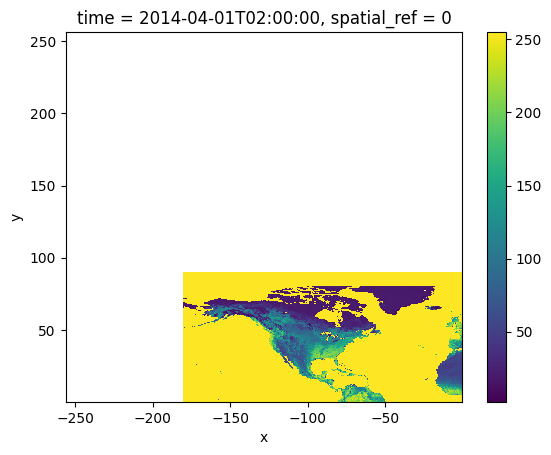

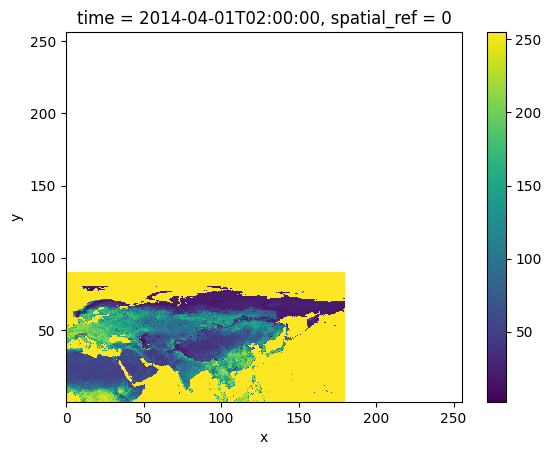

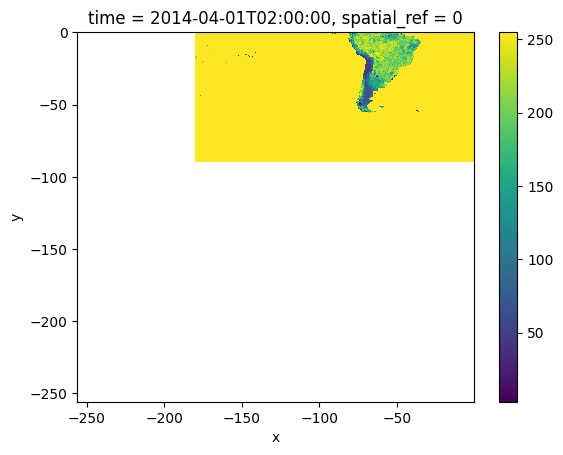

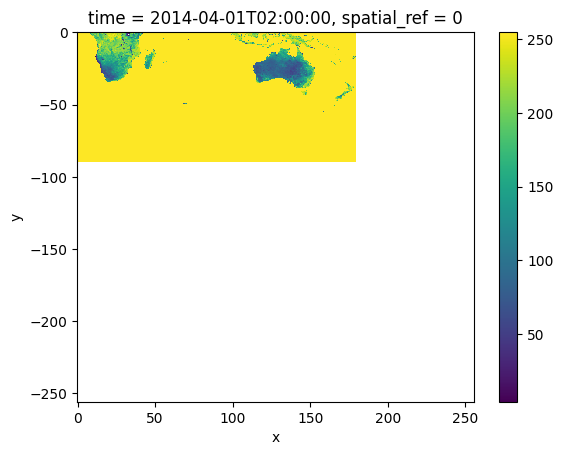

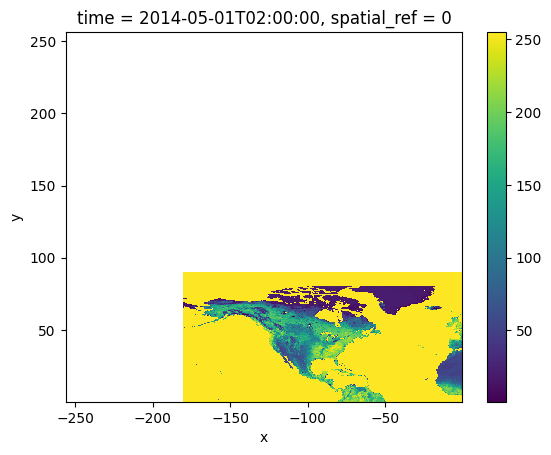

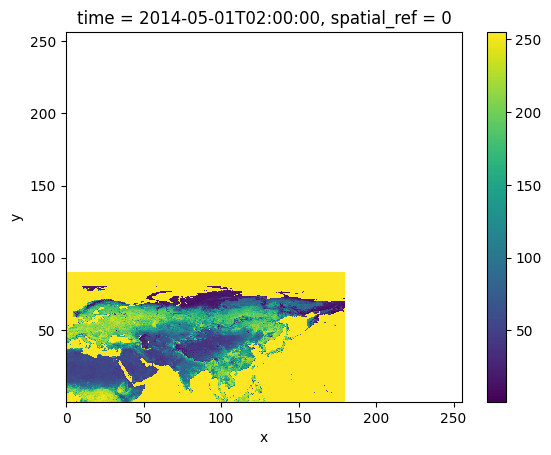

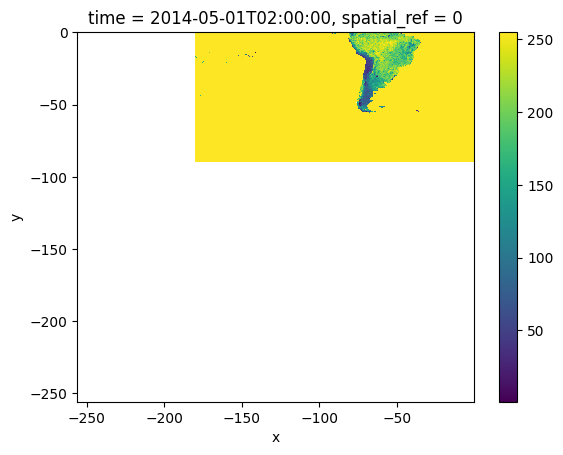

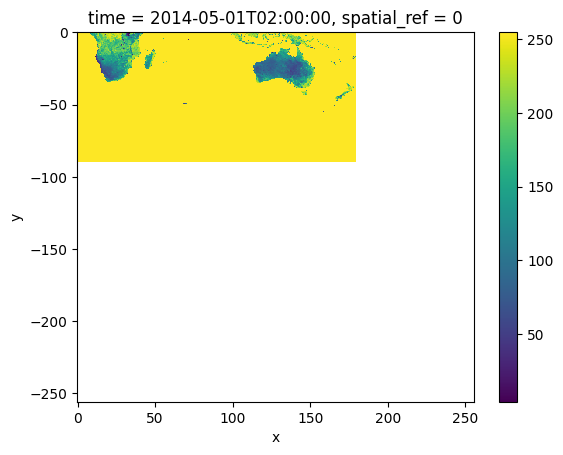

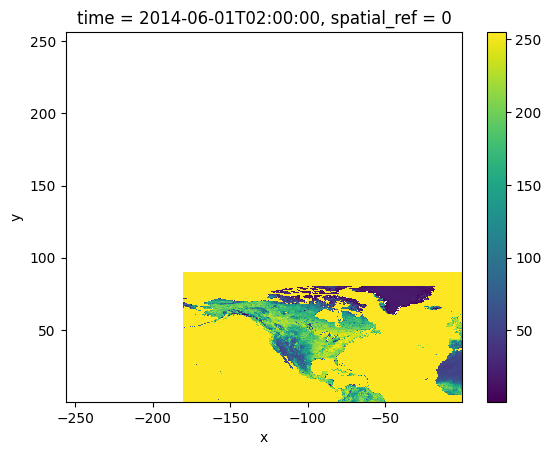

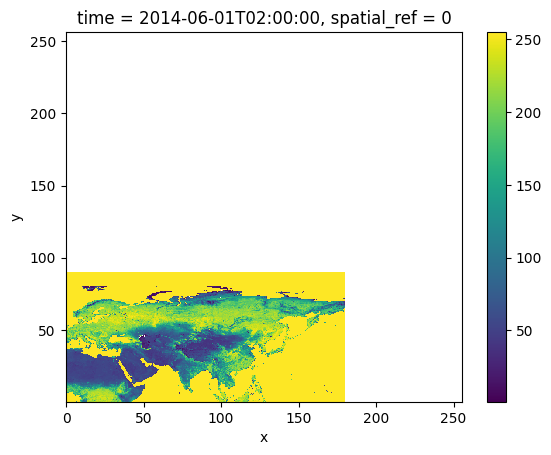

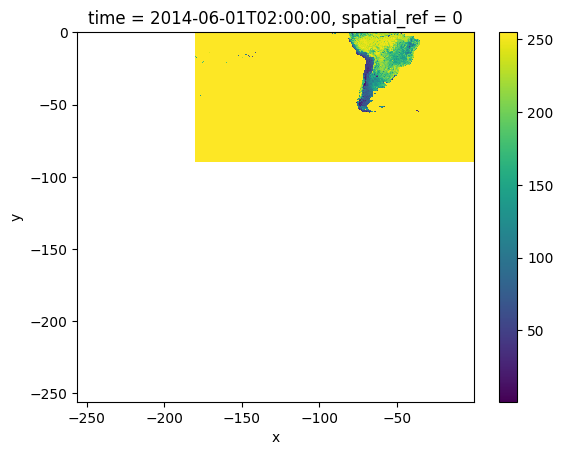

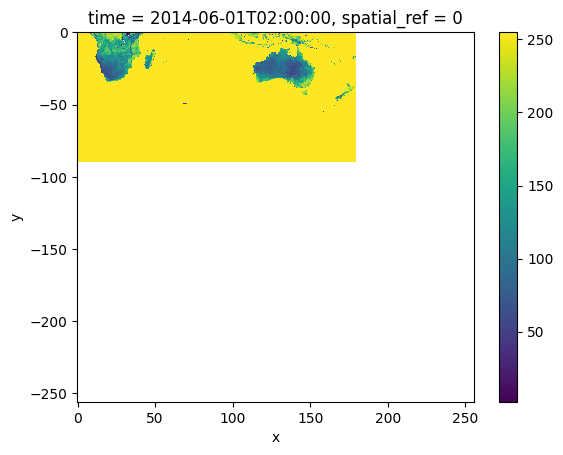

In [7]:
async for tile in workflow.raster_stream(bbox):
    tile.plot()
    plt.show()

/home/beilschmidt/git/geoengine-python/env/lib/python3.10/site-packages/rasterio/windows.py:314: RasterioDeprecationWarning: The height, width, and precision parameters are unused, deprecated, and will be removed in 2.0.0.
  warnings.warn(


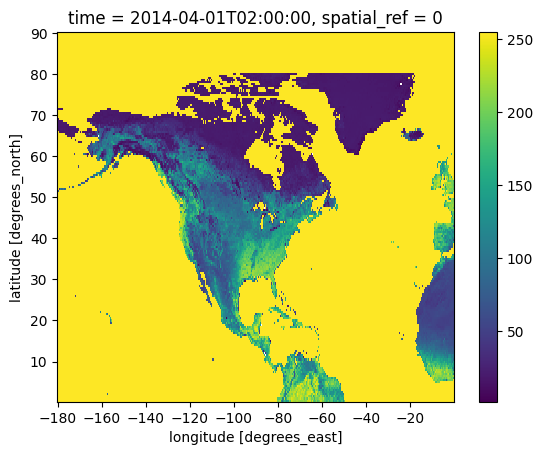

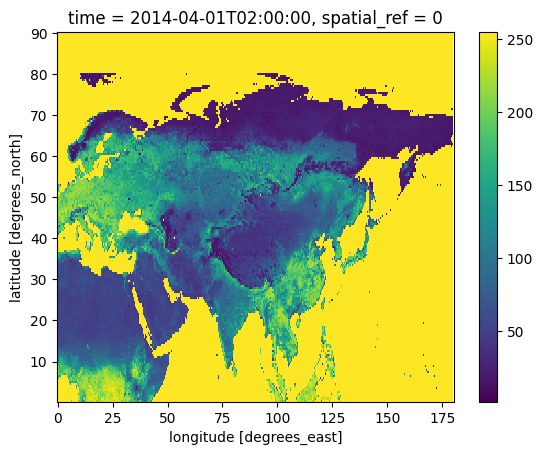

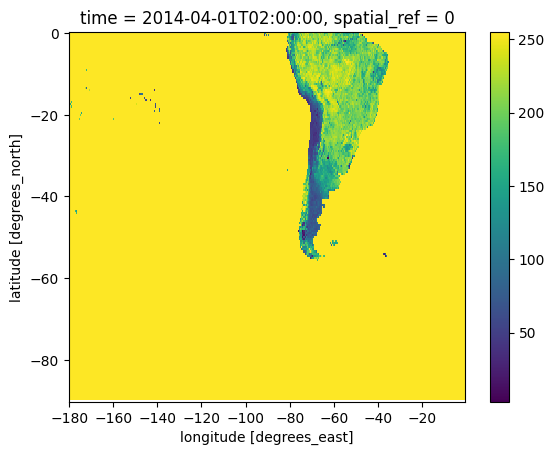

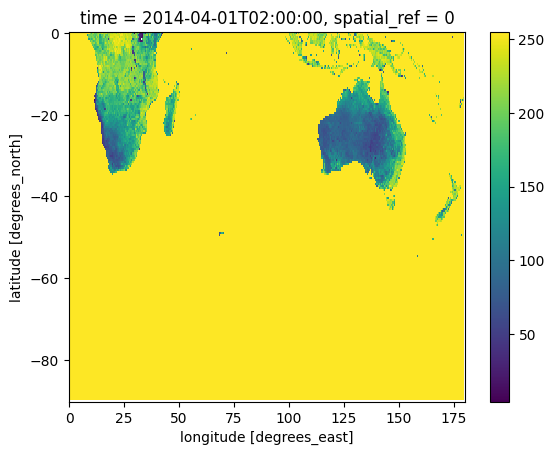

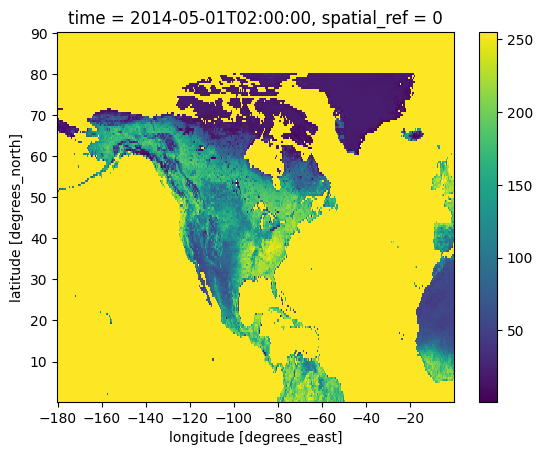

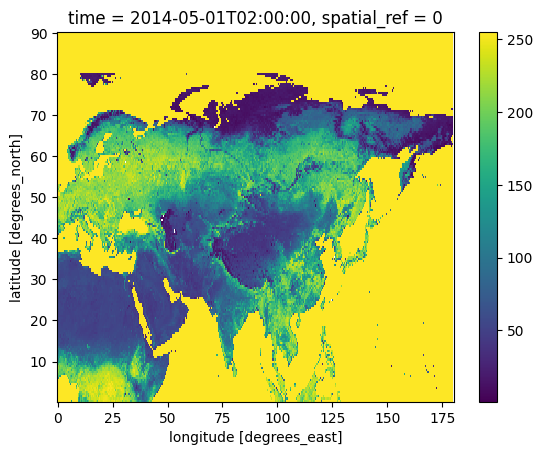

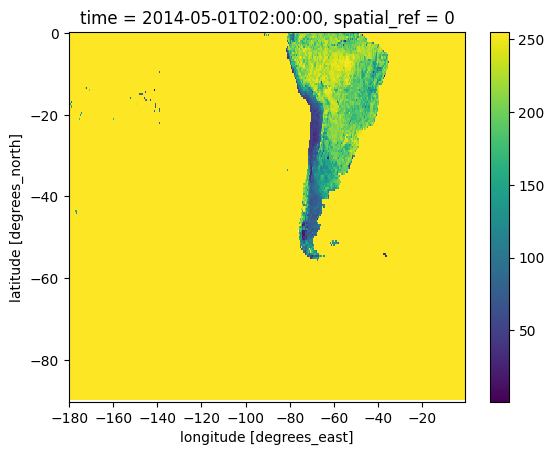

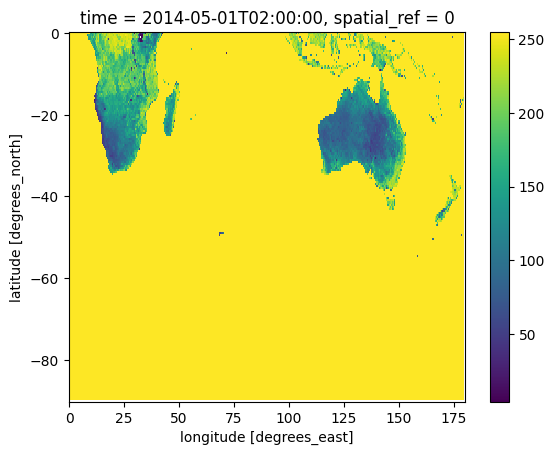

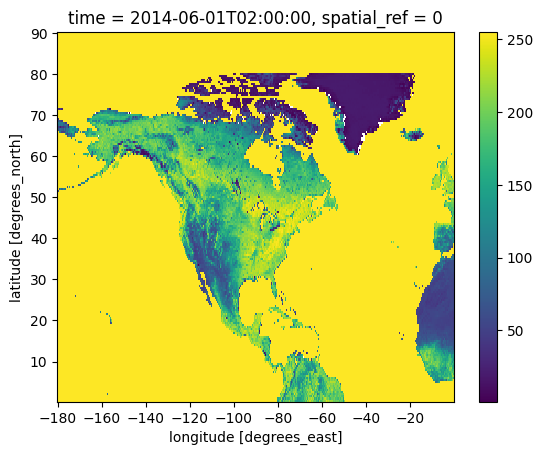

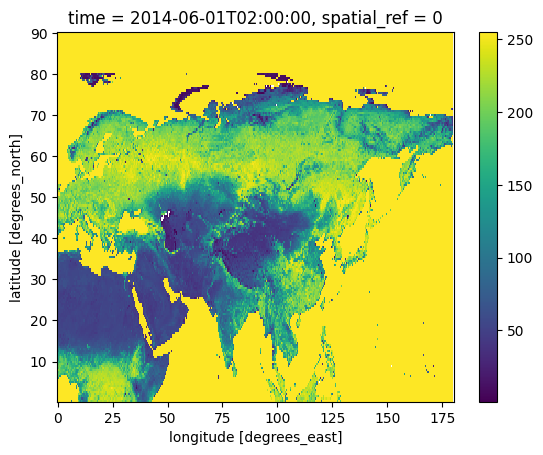

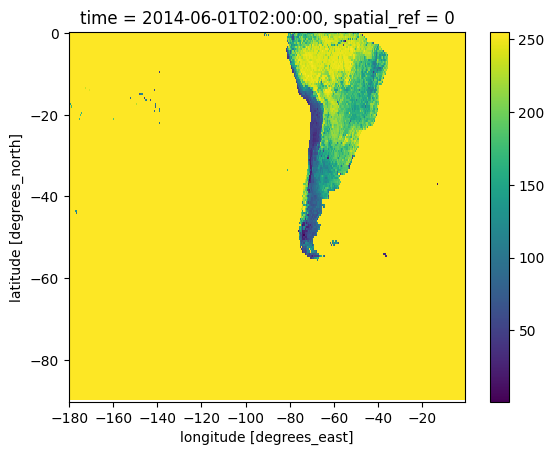

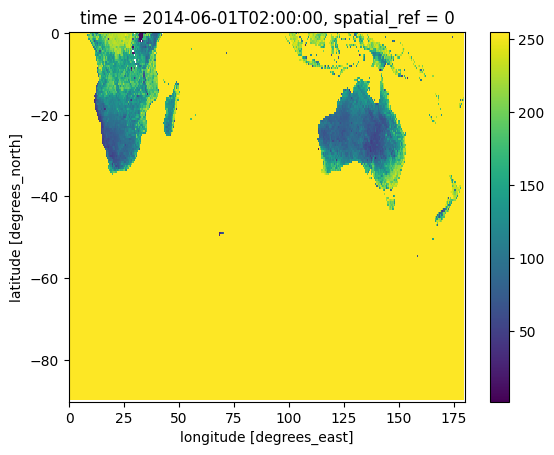

In [8]:
async for tile in workflow.raster_stream(bbox, clip_to_query_rectangle=True):
    tile.plot()
    plt.show()

# Query single tiles, merge them locally and output them as a single `DataArray`

default (no clip)


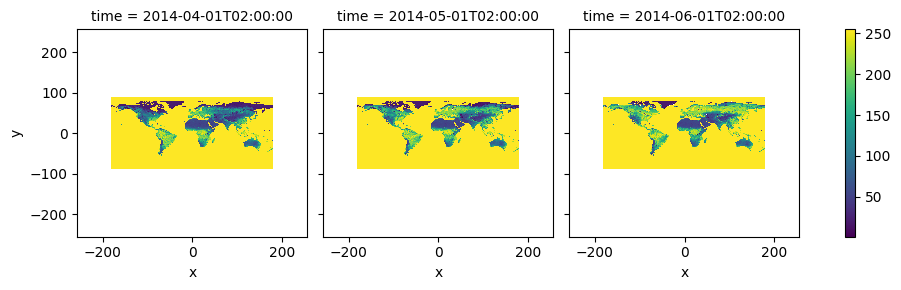

clip to query rectangle


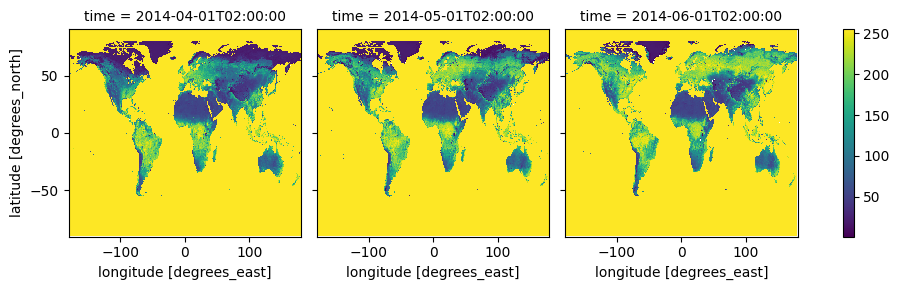

<xarray.DataArray (time: 3, y: 361, x: 721)>
array([[[255., 255., 255., ..., 255., 255.,  nan],
        [255., 255., 255., ..., 255., 255.,  nan],
        [255., 255., 255., ..., 255., 255.,  nan],
        ...,
        [255., 255., 255., ..., 255., 255.,  nan],
        [255., 255., 255., ..., 255., 255.,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[255., 255., 255., ..., 255., 255.,  nan],
        [255., 255., 255., ..., 255., 255.,  nan],
        [255., 255., 255., ..., 255., 255.,  nan],
        ...,
        [255., 255., 255., ..., 255., 255.,  nan],
        [255., 255., 255., ..., 255., 255.,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[255., 255., 255., ..., 255., 255.,  nan],
        [255., 255., 255., ..., 255., 255.,  nan],
        [255., 255., 255., ..., 255., 255.,  nan],
        ...,
        [255., 255., 255., ..., 255., 255.,  nan],
        [255., 255., 255., ..., 255., 255.,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]])
Coordinates:
  * x            (x) float64 -180.0 -179.5 -179.0 -178.5 ... 179.0 179.5 180.0
  * y            (y) float64 90.0 89.5 89.0 88.5 ... -88.5 -89.0 -89.5 -90.0
  * time         (time) datetime64[ns] 2014-04-01T02:00:00 ... 2014-06-01T02:...
    spatial_ref  int64 0

In [9]:
# clippying may output a warning, but this is a false positive
warnings.simplefilter(action='ignore', category=FutureWarning)

print('default (no clip)')

array = await workflow.raster_stream_into_xarray(bbox)

array.plot(col="time");
plt.show()

print('clip to query rectangle')

array = await workflow.raster_stream_into_xarray(bbox, clip_to_query_rectangle=True)

array.plot(col="time");
plt.show()

array